In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
auto = pd.read_csv('Automobile.csv')
auto.head()

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,168,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [87]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
symboling              201 non-null int64
normalized_losses      201 non-null int64
make                   201 non-null object
fuel_type              201 non-null object
aspiration             201 non-null object
number_of_doors        201 non-null object
body_style             201 non-null object
drive_wheels           201 non-null object
engine_location        201 non-null object
wheel_base             201 non-null float64
length                 201 non-null float64
width                  201 non-null float64
height                 201 non-null float64
curb_weight            201 non-null int64
engine_type            201 non-null object
number_of_cylinders    201 non-null object
engine_size            201 non-null int64
fuel_system            201 non-null object
bore                   201 non-null float64
stroke                 201 non-null float64
compression_ratio      201 non-nu

In [88]:
cat_cols = ['symboling','fuel_type','aspiration','number_of_doors','body_style','drive_wheels','engine_location',
            'engine_type','number_of_cylinders','fuel_system']

numeric_cols = ['normalized_losses','wheel_base','length','width','height','curb_weight','engine_size','bore','stroke',
                'compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']

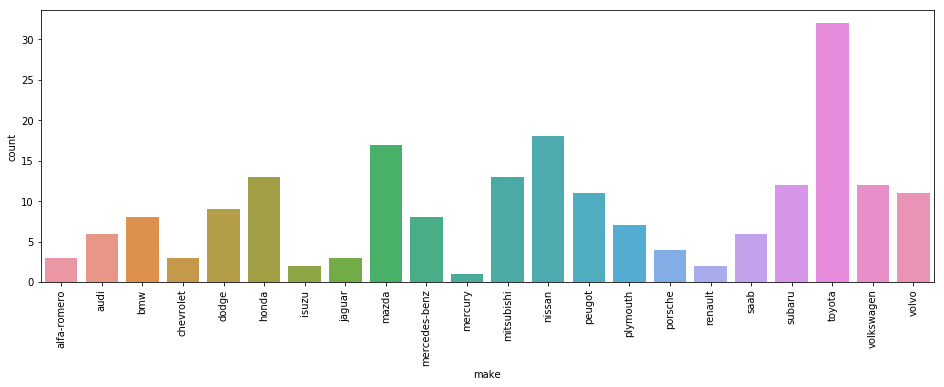

In [89]:
plt.figure(figsize=(16,5))
sns.countplot(auto['make'])
plt.xticks(rotation=90)
plt.show()

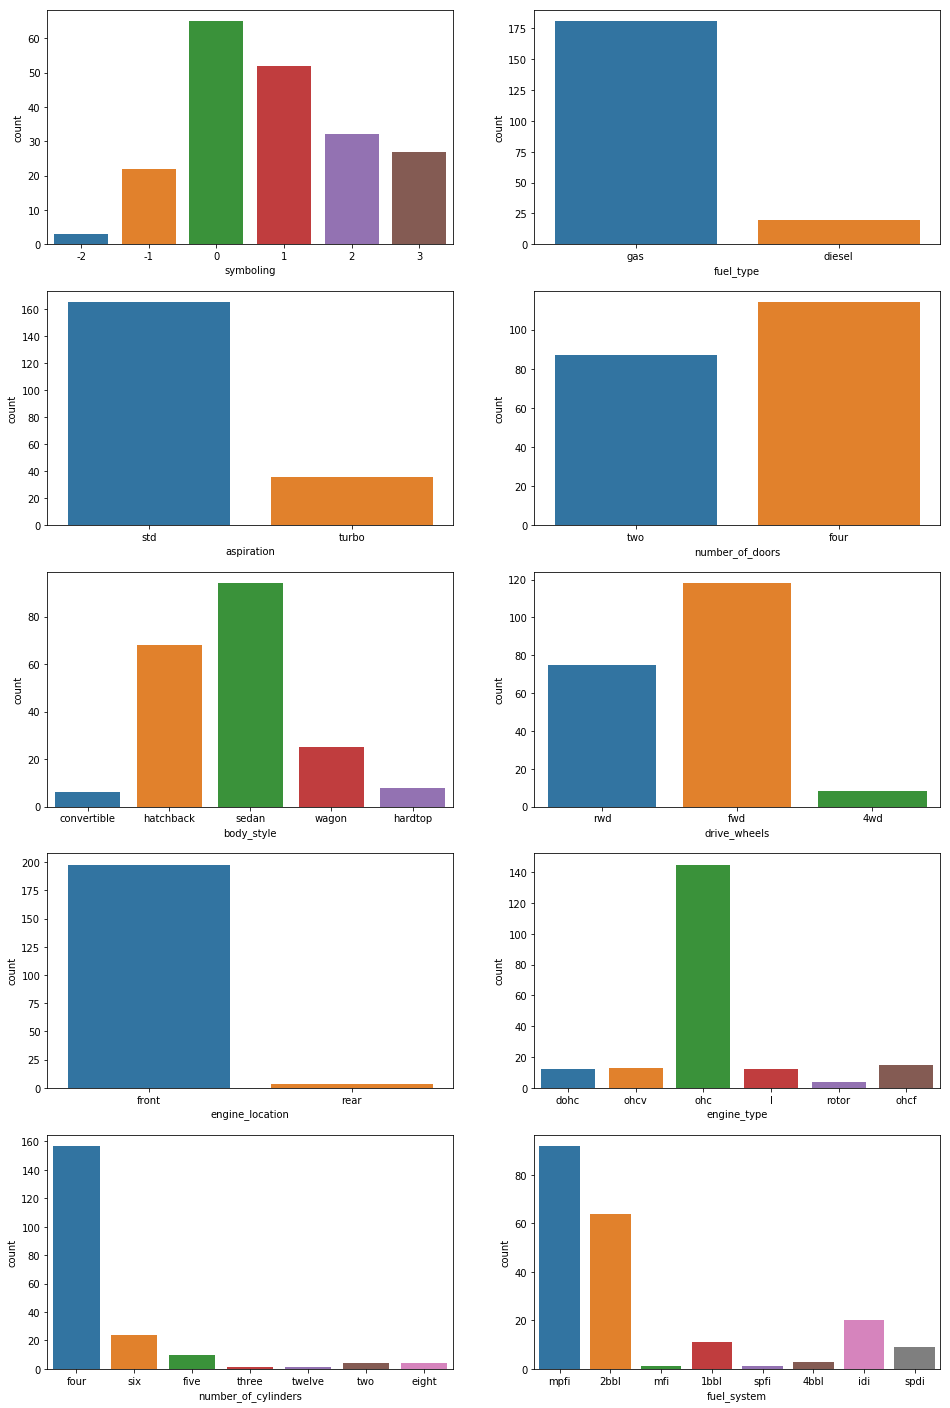

In [90]:
# count plots for categorical columns
nrows,ncols = 5,2
fig,ax = plt.subplots(nrows,ncols,figsize=(8*ncols,5*nrows))
i,j = 0,0
for col in cat_cols:
    sns.countplot(auto[col],ax=ax[i,j])
    j = (j + 1)%ncols
    if j == 0: i = i +1
plt.show()

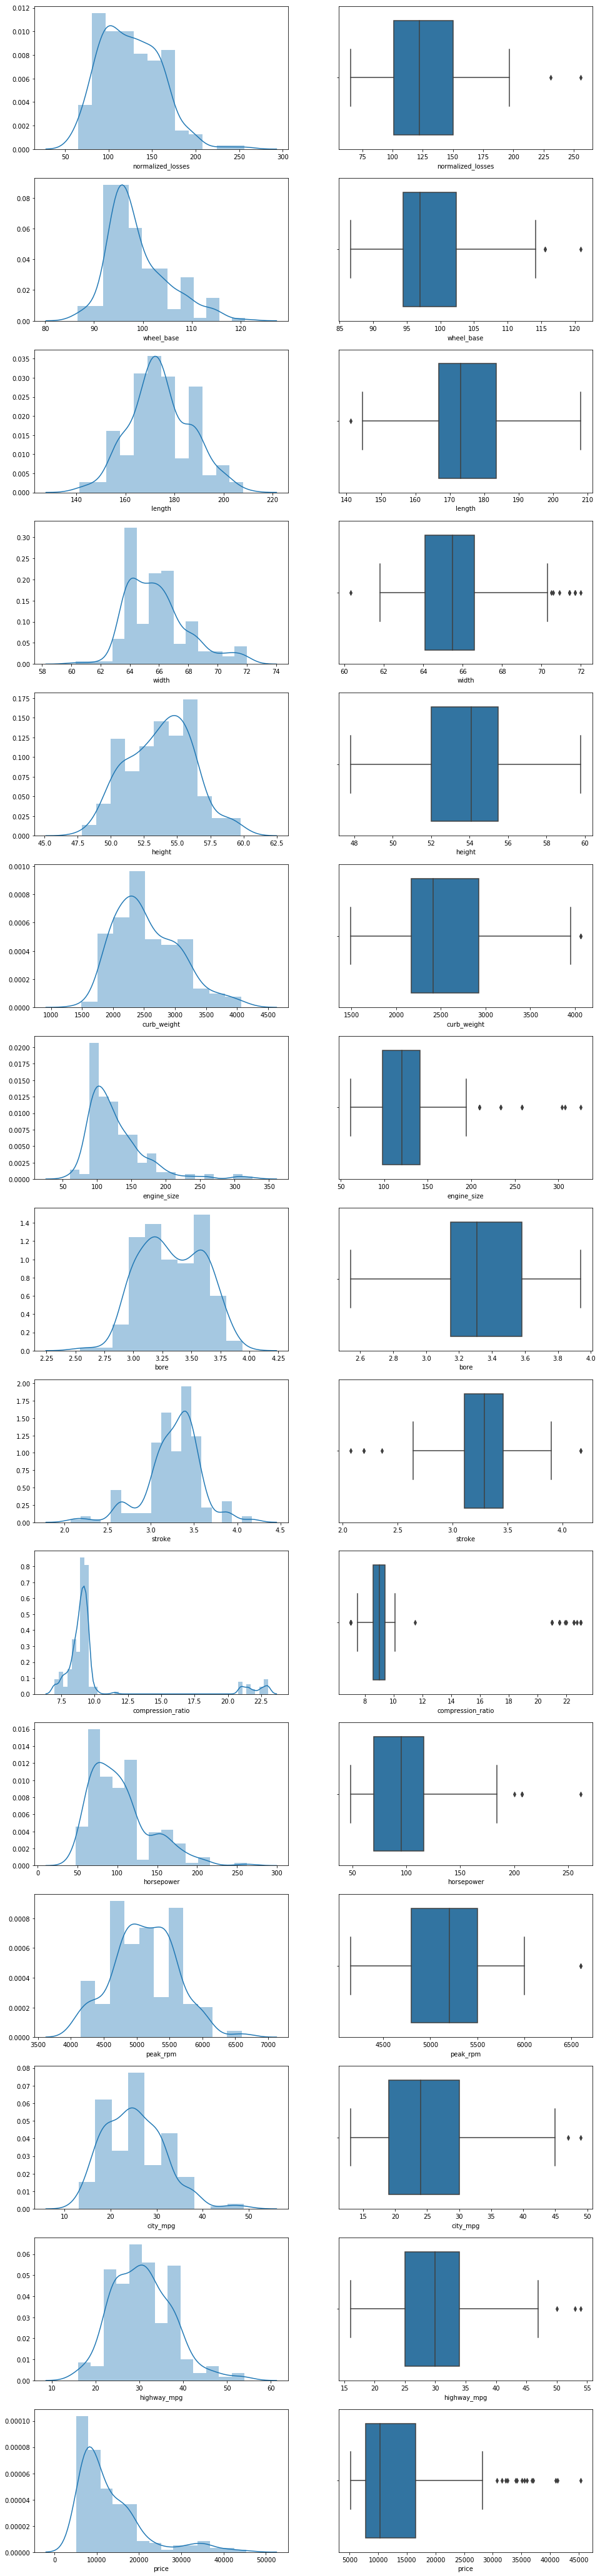

In [91]:
# dist plots for numerical columns
nrows,ncols = 15,2
fig,ax = plt.subplots(nrows,ncols,figsize=(8*ncols,5*nrows))
i = 0
for col in numeric_cols:
    sns.distplot(auto[col],ax=ax[i,0])
    sns.boxplot(auto[col],ax=ax[i,1])
    i = i + 1
plt.show()

Let's do dummification of the categorical variables:

In [92]:
auto = pd.get_dummies(auto,columns=cat_cols,drop_first=True)

Since there are many categories in *make* column, we will only consider those that have more than 10 rows (approx 5% of total rows)

In [93]:
threshold=10
freqs = auto['make'].value_counts()
k = freqs[freqs>threshold].index
for cat in k:
    name = 'make_'+cat
    auto[name] = (auto['make']==cat).astype(int)
    print(name)
del auto['make']

make_toyota
make_nissan
make_mazda
make_mitsubishi
make_honda
make_subaru
make_volkswagen
make_peugot
make_volvo


In [94]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 57 columns):
normalized_losses             201 non-null int64
wheel_base                    201 non-null float64
length                        201 non-null float64
width                         201 non-null float64
height                        201 non-null float64
curb_weight                   201 non-null int64
engine_size                   201 non-null int64
bore                          201 non-null float64
stroke                        201 non-null float64
compression_ratio             201 non-null float64
horsepower                    201 non-null int64
peak_rpm                      201 non-null int64
city_mpg                      201 non-null int64
highway_mpg                   201 non-null int64
price                         201 non-null int64
symboling_-1                  201 non-null uint8
symboling_0                   201 non-null uint8
symboling_1                   201 non-null uint8

Next, scaling all the numerical columns except for *price* which is our dependent variable

In [95]:
numeric_cols.remove('price')

In [96]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
auto[numeric_cols] = DataFrame(sc.fit_transform(auto[numeric_cols]),columns=numeric_cols,index=auto.index)

C:\Users\mohit\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\mohit\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [99]:
auto.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,...,fuel_system_spfi,make_toyota,make_nissan,make_mazda,make_mitsubishi,make_honda,make_subaru,make_volkswagen,make_peugot,make_volvo
0,1.278345,-1.685107,-0.439409,-0.853460,-2.034081,-0.014858,0.075389,0.524484,-1.834665,-0.291435,...,0,0,0,0,0,0,0,0,0,0
1,1.278345,-1.685107,-0.439409,-0.853460,-2.034081,-0.014858,0.075389,0.524484,-1.834665,-0.291435,...,0,0,0,0,0,0,0,0,0,0
2,1.278345,-0.710103,-0.244152,-0.185597,-0.559713,0.518080,0.606234,-2.428810,0.656795,-0.291435,...,0,0,0,0,0,0,0,0,0,0
3,1.158904,0.165748,0.195176,0.148335,0.218425,-0.423766,-0.431327,-0.522253,0.436033,-0.041121,...,0,0,0,0,0,0,0,0,0,0
4,1.158904,0.099646,0.195176,0.243744,0.218425,0.520017,0.220165,-0.522253,0.436033,-0.541748,...,0,0,0,0,0,0,0,0,0,0


In [104]:
x = auto.drop('price',axis=1)
y = auto['price']

In [129]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=0)

In [130]:
xtrain.shape

(140, 56)

In [131]:
xtest.shape

(61, 56)

### Linear Regression

In [132]:
from sklearn.linear_model import LinearRegression
lm1 = LinearRegression()
lm1.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [133]:
from sklearn.metrics import mean_squared_error,r2_score
ytrain_pred = lm1.predict(xtrain)
train_mse = mean_squared_error(ytrain_pred,ytrain)
train_r2 = r2_score(ytrain_pred,ytrain)

ytest_pred = lm1.predict(xtest)
test_mse = mean_squared_error(ytest_pred,ytest)
test_r2 = r2_score(ytest_pred,ytest)

DataFrame({'MSE':[train_mse,test_mse],'R2':[train_r2,test_r2]},index=['Train','Test'])

,MSE,R2
Train,3.155077e+06,0.93496
Test,1.487575e+07,0.70961


We got a high train R^2 with 0.93 but a significantly lower test R^2 with 0.71

### Ridge Regression

In [134]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [135]:
lambdas = np.linspace(1,100,100)
params = {'alpha':lambdas}              # list of alpha values to run ridge regression on 
model = Ridge(fit_intercept=True)
grid_search = GridSearchCV(model,param_grid=params,cv=10,scoring='r2')
grid_search.fit(xtrain,ytrain)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([  1.,   2., ...,  99., 100.])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [136]:
grid_search.best_estimator_

Ridge(alpha=13.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [144]:
ridge_model = grid_search.best_estimator_

ridge_ytrain_pred = ridge_model.predict(xtrain)
ridge_train_mse = mean_squared_error(ridge_ytrain_pred,ytrain)
ridge_train_r2 = r2_score(ridge_ytrain_pred,ytrain)

ridge_ytest_pred = ridge_model.predict(xtest)
ridge_test_mse = mean_squared_error(ridge_ytest_pred,ytest)
ridge_test_r2 = r2_score(ridge_ytest_pred,ytest)

DataFrame({'MSE':[ridge_train_mse,ridge_test_mse],'R2':[ridge_train_r2,ridge_test_r2]},index=['Train','Test'])

,MSE,R2
Train,3.738563e+06,0.919266
Test,1.399037e+07,0.707388


- We got a slightly lower training R2 than our previous linear regression model with 0.91
- But a similiar test R2 as our linear regression model with 0.71

### Lasso Regression

In [139]:
from sklearn.linear_model import Lasso

In [141]:
lambdas = np.linspace(1,100,100)
model = Lasso(fit_intercept=True)
params = {'alpha':lambdas}
grid_search = GridSearchCV(model,param_grid=params,cv=10,scoring='r2')
grid_search.fit(xtrain,ytrain)

C:\Users\mohit\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\mohit\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\mohit\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\mohit\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([  1.,   2., ...,  99., 100.])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [142]:
grid_search.best_estimator_

Lasso(alpha=14.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [143]:
lasso_model = grid_search.best_estimator_

lasso_ytrain_pred = lasso_model.predict(xtrain)
lasso_train_mse = mean_squared_error(lasso_ytrain_pred,ytrain)
lasso_train_r2 = r2_score(lasso_ytrain_pred,ytrain)

lasso_ytest_pred = lasso_model.predict(xtest)
lasso_test_mse = mean_squared_error(lasso_ytest_pred,ytest)
lasso_test_r2 = r2_score(lasso_ytest_pred,ytest)

DataFrame({'MSE':[lasso_train_mse,lasso_test_mse],'R2':[lasso_train_r2,lasso_test_r2]},index=['Train','Test'])

,MSE,R2
Train,3.738563e+06,0.919266
Test,1.399037e+07,0.707388


We got similar results train and test R2 as our Ridge model